In [1]:
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
from pyspark.sql import types
from pyspark.sql.functions import unix_timestamp, from_unixtime
from pyspark.sql.window import Window

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [10]:
spark = SparkSession.builder.enableHiveSupport().appName('ReadWriteData').getOrCreate()

In [11]:
sc = spark.sparkContext
sc.defaultParallelism

24

In [20]:
sc

<SparkContext master=local[*] appName=ReadData>

In [21]:
import os
os.getcwd()

'/home/jovyan'

In [28]:
from pyspark.sql import HiveContext
hive_context = HiveContext(sc)

In [209]:
%time df = spark.read.csv("Crimes_-_2001_to_Present (1).csv", inferSchema=True, header=True)

CPU times: user 2.61 ms, sys: 0 ns, total: 2.61 ms
Wall time: 709 ms


In [210]:
df.printSchema()

root
 |-- ID: integer (nullable = true)
 |-- Case Number: string (nullable = true)
 |-- Date: string (nullable = true)
 |-- Block: string (nullable = true)
 |-- IUCR: string (nullable = true)
 |-- Primary Type: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Location Description: string (nullable = true)
 |-- Arrest: boolean (nullable = true)
 |-- Domestic: boolean (nullable = true)
 |-- Beat: integer (nullable = true)
 |-- District: integer (nullable = true)
 |-- Ward: integer (nullable = true)
 |-- Community Area: integer (nullable = true)
 |-- FBI Code: string (nullable = true)
 |-- X Coordinate: integer (nullable = true)
 |-- Y Coordinate: integer (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Updated On: string (nullable = true)
 |-- Latitude: double (nullable = true)
 |-- Longitude: double (nullable = true)
 |-- Location: string (nullable = true)



In [49]:
hive_context.sql("show databases").show();

+--------------+
|     namespace|
+--------------+
|chicago_crimes|
|       default|
+--------------+



In [211]:
df = df.withColumnRenamed("ID", "id")\
    .withColumnRenamed("Case Number","case_cumber")\
    .withColumnRenamed("Date","date")\
    .withColumnRenamed("Block", "block")\
    .withColumnRenamed("IUCR", "iucr")\
    .withColumnRenamed("Primary Type", "primary_type")\
    .withColumnRenamed("Description", "description")\
    .withColumnRenamed("Location Description","location_description")\
    .withColumnRenamed("Arrest","arrest")\
    .withColumnRenamed("Domestic", "domestic")\
    .withColumnRenamed("Beat", "beat")\
    .withColumnRenamed("District", "district")\
    .withColumnRenamed("Ward", "ward")\
    .withColumnRenamed("Community Area","community_area")\
    .withColumnRenamed("FBI Code","fbi_code")\
    .withColumnRenamed("X Coordinate", "x_coordinate")\
    .withColumnRenamed("Y Coordinate", "y_coordinate")\
    .withColumnRenamed("Year", "year")\
    .withColumnRenamed("Updated On", "updated_on")\
    .withColumnRenamed("Latitude","latitude")\
    .withColumnRenamed("Longitude","longitude")\
    .withColumnRenamed("Location", "location")

In [51]:
hive_context.sql("show databases").show();

+--------------+
|     namespace|
+--------------+
|chicago_crimes|
|       default|
+--------------+



In [55]:
hive_context.sql("create database chicago_crimes1");

In [121]:
hive_context.sql("show tables").show();

+---------+---------------+-----------+
|namespace|      tableName|isTemporary|
+---------+---------------+-----------+
|  default|chicago_crimes1|      false|
|  default|foodinspections|      false|
+---------+---------------+-----------+



In [57]:
hive_context.sql("drop table if exists chicago_crimes");

In [212]:
df.write.mode('overwrite').saveAsTable('chicago_crimes2')

In [213]:
df1 = hive_context.table("chicago_crimes2")
df1.show(5)

+--------+-----------+--------------------+--------------------+----+-----------------+--------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      id|case_cumber|                date|               block|iucr|     primary_type|   description|location_description|arrest|domestic|beat|district|ward|community_area|fbi_code|x_coordinate|y_coordinate|year|          updated_on|    latitude|    longitude|            location|
+--------+-----------+--------------------+--------------------+----+-----------------+--------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|10072869|   HY259916|05/13/2015 09:15:...|   031XX W CERMAK RD|031A|          ROBBERY|ARMED: HANDGUN|            SIDEWALK| false|   false|1022|      1

## Problem 1

a)

In [214]:
df1.describe().toPandas()

,summary,id,case_cumber,date,block,iucr,primary_type,description,location_description,beat,...,ward,community_area,fbi_code,x_coordinate,y_coordinate,year,updated_on,latitude,longitude,location
0,count,2086509,2086509,2086509,2086509,2086509,2086509,2086509,2082636,2086509,...,1499802,1502149,2086509,2074557,2074557,2086509,2086509,2074557,2074557,2074557
1,mean,6584920.753162819,271044.0,None,None,1125.3120223472015,None,None,None,1181.7922712051566,...,22.965713474178592,36.95942280026815,11.974667034942778,1164681.962866289,1886582.3362655255,2009.473684513223,None,41.84437703545333,-87.67117746611007,None
2,stddev,4511404.470700128,167805.04570482974,None,None,850.0328581260538,None,None,None,703.1902937143857,...,14.006137847185988,21.454763891971435,7.340137505481005,16142.36652211198,31248.436053971905,7.72767840077094,None,0.08593827566601325,0.05874516236726268,None
3,min,1051,.JB299184,01/01/2001 01:00:00 AM,0000X E 100 PL,0110,ARSON,$300 AND UNDER,ABANDONED BUILDING,111,...,1,0,01A,0,0,2001,01/01/2016 03:54:40 PM,36.619446395,-91.686565684,"(36.619446395, -91.686565684)"
4,max,12875442,ZZ591134,12/31/2019 09:00:00 AM,137XX S LEYDEN AVE,9901,WEAPONS VIOLATION,WIREROOM/SPORTS,YARD,2535,...,50,77,26,1205119,1951610,2022,12/31/2019 03:50:01 PM,42.022878225,-87.524529378,"(42.022878225, -87.677335866)"


b)

In [215]:
df1 = df1.drop("beat", "ward", "latitude", "longitude")
df1.columns

['id',
 'case_cumber',
 'date',
 'block',
 'iucr',
 'primary_type',
 'description',
 'location_description',
 'arrest',
 'domestic',
 'district',
 'community_area',
 'fbi_code',
 'x_coordinate',
 'y_coordinate',
 'year',
 'updated_on',
 'location']

c)

In [216]:
df1.printSchema()

root
 |-- id: integer (nullable = true)
 |-- case_cumber: string (nullable = true)
 |-- date: string (nullable = true)
 |-- block: string (nullable = true)
 |-- iucr: string (nullable = true)
 |-- primary_type: string (nullable = true)
 |-- description: string (nullable = true)
 |-- location_description: string (nullable = true)
 |-- arrest: boolean (nullable = true)
 |-- domestic: boolean (nullable = true)
 |-- district: integer (nullable = true)
 |-- community_area: integer (nullable = true)
 |-- fbi_code: string (nullable = true)
 |-- x_coordinate: integer (nullable = true)
 |-- y_coordinate: integer (nullable = true)
 |-- year: integer (nullable = true)
 |-- updated_on: string (nullable = true)
 |-- location: string (nullable = true)



In [217]:
df2 = df1.withColumn("date", unix_timestamp("date", "MM/dd/yyyy hh:mm:ss aa"))
df2 = df2.withColumn("date", df2.date.cast(types.TimestampType()))
df2 = df2.withColumn("year_month", from_unixtime(unix_timestamp("date", "MM/dd/yyyy hh:mm:ss aa"), "yyy-MM"))
df2 = df2.withColumn("updated_on", unix_timestamp("updated_on", "MM/dd/yyyy hh:mm:ss aa"))
df2 = df2.withColumn("updated_on", df2.updated_on.cast(types.TimestampType()))

In [218]:
df2.printSchema()

root
 |-- id: integer (nullable = true)
 |-- case_cumber: string (nullable = true)
 |-- date: timestamp (nullable = true)
 |-- block: string (nullable = true)
 |-- iucr: string (nullable = true)
 |-- primary_type: string (nullable = true)
 |-- description: string (nullable = true)
 |-- location_description: string (nullable = true)
 |-- arrest: boolean (nullable = true)
 |-- domestic: boolean (nullable = true)
 |-- district: integer (nullable = true)
 |-- community_area: integer (nullable = true)
 |-- fbi_code: string (nullable = true)
 |-- x_coordinate: integer (nullable = true)
 |-- y_coordinate: integer (nullable = true)
 |-- year: integer (nullable = true)
 |-- updated_on: timestamp (nullable = true)
 |-- location: string (nullable = true)
 |-- year_month: string (nullable = true)



In [333]:
df2.show(5)

+--------+-----------+----------+--------------------+----+-----------------+--------------+--------------------+------+--------+--------+--------------+--------+------------+------------+----+-------------------+--------------------+----------+---+-----+
|      id|case_cumber|      date|               block|iucr|     primary_type|   description|location_description|arrest|domestic|district|community_area|fbi_code|x_coordinate|y_coordinate|year|         updated_on|            location|year_month|dow|month|
+--------+-----------+----------+--------------------+----+-----------------+--------------+--------------------+------+--------+--------+--------------+--------+------------+------------+----+-------------------+--------------------+----------+---+-----+
|10072869|   HY259916|2015-05-13|   031XX W CERMAK RD|031A|          ROBBERY|ARMED: HANDGUN|            SIDEWALK| false|   false|      10|            30|      03|     1155948|     1889214|2015|2018-02-10 15:50:01|(41.851794306, -8..

d)

In [219]:
df2 = df2.withColumn("date", F.to_date("date"))
df2 = df2.withColumn("dow", F.dayofweek("date"))
df2 = df2.withColumn("month", F.month(F.to_date("date")))
df2 = df2.withColumn("year", F.year(F.to_date("date")))
df2.printSchema()

root
 |-- id: integer (nullable = true)
 |-- case_cumber: string (nullable = true)
 |-- date: date (nullable = true)
 |-- block: string (nullable = true)
 |-- iucr: string (nullable = true)
 |-- primary_type: string (nullable = true)
 |-- description: string (nullable = true)
 |-- location_description: string (nullable = true)
 |-- arrest: boolean (nullable = true)
 |-- domestic: boolean (nullable = true)
 |-- district: integer (nullable = true)
 |-- community_area: integer (nullable = true)
 |-- fbi_code: string (nullable = true)
 |-- x_coordinate: integer (nullable = true)
 |-- y_coordinate: integer (nullable = true)
 |-- year: integer (nullable = true)
 |-- updated_on: timestamp (nullable = true)
 |-- location: string (nullable = true)
 |-- year_month: string (nullable = true)
 |-- dow: integer (nullable = true)
 |-- month: integer (nullable = true)



In [220]:
cn = spark.read.csv("chi_communities.csv", inferSchema=True, header=True)
cn.show(5)

+--------------+-------------------+
|community_area|community_area_name|
+--------------+-------------------+
|             0|            Missing|
|             1|        Rogers Park|
|             2|         West Ridge|
|             3|             Uptown|
|             4|     Lincoln Square|
+--------------+-------------------+
only showing top 5 rows



In [221]:
df3 = df2.join(cn, on="community_area")

In [222]:
df3.printSchema()

root
 |-- community_area: integer (nullable = true)
 |-- id: integer (nullable = true)
 |-- case_cumber: string (nullable = true)
 |-- date: date (nullable = true)
 |-- block: string (nullable = true)
 |-- iucr: string (nullable = true)
 |-- primary_type: string (nullable = true)
 |-- description: string (nullable = true)
 |-- location_description: string (nullable = true)
 |-- arrest: boolean (nullable = true)
 |-- domestic: boolean (nullable = true)
 |-- district: integer (nullable = true)
 |-- fbi_code: string (nullable = true)
 |-- x_coordinate: integer (nullable = true)
 |-- y_coordinate: integer (nullable = true)
 |-- year: integer (nullable = true)
 |-- updated_on: timestamp (nullable = true)
 |-- location: string (nullable = true)
 |-- year_month: string (nullable = true)
 |-- dow: integer (nullable = true)
 |-- month: integer (nullable = true)
 |-- community_area_name: string (nullable = true)



## Problem 2

a)

In [223]:
df3.filter(df3.description.like("%AGGRAVATED%"))\
    .groupby(df3.description)\
    .count()\
    .sort("count").orderBy(["count"], ascending=[0])\
    .show()

+--------------------+-----+
|         description|count|
+--------------------+-----+
| AGGRAVATED: HANDGUN|24445|
|AGGRAVATED: OTHER...|19639|
|AGGRAVATED:KNIFE/...|13770|
|      NON-AGGRAVATED| 4581|
|AGGRAVATED DOMEST...| 4469|
|          AGGRAVATED| 3551|
|AGGRAVATED DOMEST...| 2926|
|AGGRAVATED VEHICU...| 2642|
|AGGRAVATED DOMEST...| 1701|
|   AGGRAVATED: OTHER| 1018|
|AGGRAVATED DOMEST...|  969|
|AGGRAVATED - HANDGUN|  934|
|AGGRAVATED OF A S...|  920|
|AGGRAVATED: OTHER...|  822|
|AGGRAVATED PO: OT...|  604|
|AGGRAVATED FINANC...|  483|
|ATTEMPT NON-AGGRA...|  382|
|AGGRAVATED OF A C...|  298|
|AGGRAVATED PO: HA...|  271|
| ATTEMPT: AGGRAVATED|  270|
+--------------------+-----+
only showing top 20 rows



b)

In [224]:
df3.filter(df3.location_description=="APARTMENT")\
    .groupby(df3.primary_type)\
    .count()\
    .sort("count").orderBy(["count"], ascending=[0])\
    .show(5)

+---------------+-----+
|   primary_type|count|
+---------------+-----+
|        BATTERY|61259|
|       BURGLARY|21604|
|CRIMINAL DAMAGE|19542|
|          THEFT|18857|
|  OTHER OFFENSE|15102|
+---------------+-----+
only showing top 5 rows



In [225]:
df3.filter(((df3.location_description=="APARTMENT") & (df3.primary_type=="BATTERY")))\
    .groupby(df3.community_area_name)\
    .count()\
    .sort("count").orderBy(["count"], ascending=[0])\
    .show(5)

+--------------------+-----+
| community_area_name|count|
+--------------------+-----+
|              Austin| 5108|
|         South Shore| 4798|
|      North Lawndale| 2883|
|Greater Grand Cro...| 2682|
|      Auburn Gresham| 2325|
+--------------------+-----+
only showing top 5 rows



Battery is the most prevalent crime and it occurs most often in Austin.

In [226]:
spark.sql("set spark.sql.legacy.timeParserPolicy=LEGACY")

DataFrame[key: string, value: string]

c)

In [227]:
wp2020 = df3.filter(((df3.year==2020) & (df3.primary_type=="WEAPONS VIOLATION")))\
            .groupby(df3.month)\
            .count()\
            .sort("count")\
            .orderBy(["count"], ascending=[0])\
            .show(5)

+-----+-----+
|month|count|
+-----+-----+
|    8|  285|
|    3|  177|
|    4|  131|
|   12|  128|
|    7|    2|
+-----+-----+
only showing top 5 rows



d)

In [228]:
df3.filter(df3.domestic==True).groupby(df3.arrest).count().show()

+------+------+
|arrest| count|
+------+------+
|  true| 42141|
| false|186368|
+------+------+



In [229]:
df3.filter(df3.domestic==True)\
    .withColumn('arrest', df3.arrest.cast(types.IntegerType()))\
    .agg({'arrest': 'mean'}).collect()

[Row(avg(arrest)=0.1844172439597565)]

## Problem 3

a)

In [230]:
df3.filter(df3.year < 2024)\
    .groupby(df3.year, df3.month)\
    .count()\
    .groupby(df3.month)\
    .agg(F.avg('count').alias('avg_crimes'))\
    .sort("avg_crimes").orderBy(["avg_crimes"], ascending=[0])\
    .show()

+-----+------------------+
|month|        avg_crimes|
+-----+------------------+
|    8| 6583.590909090909|
|   10| 6508.181818181818|
|    7| 6347.761904761905|
|    3| 6173.380952380952|
|    5| 5986.272727272727|
|    9| 5938.545454545455|
|   11| 5853.047619047619|
|   12|5748.9047619047615|
|    6| 5677.619047619048|
|    4| 5254.761904761905|
|    1| 5168.954545454545|
|    2| 4631.909090909091|
+-----+------------------+



In [231]:
df3.filter(df3.year < 2024)\
    .groupby(df3.date, df3.dow)\
    .count()\
    .groupby(df3.dow)\
    .agg(F.avg('count').alias('avg_crimes'))\
    .sort("avg_crimes").orderBy(["avg_crimes"], ascending=[0])\
    .show()

+---+------------------+
|dow|        avg_crimes|
+---+------------------+
|  7|351.37277147487845|
|  1|344.98172757475083|
|  6| 343.5679389312977|
|  5|334.56043956043953|
|  4| 334.3375196232339|
|  2| 330.1111111111111|
|  3| 326.6298003072197|
+---+------------------+



b)

In [232]:
tmp3b = df3\
    .filter(df3.primary_type == "HOMICIDE")\
    .groupby(df3.date)\
    .count()\
    .sort("count").orderBy(["count"], ascending=[0])

In [233]:
tmp3b.show(5)

+----------+-----+
|      date|count|
+----------+-----+
|2022-10-22|    2|
|2022-09-23|    2|
|2022-10-20|    1|
|2022-08-27|    1|
|2018-03-11|    1|
+----------+-----+
only showing top 5 rows



In [234]:
days = tmp3b.select("date").head(2)
days[1][0] - days[0][0]

datetime.timedelta(days=29)

c)

In [235]:
tmp3c = df3.filter((df3.year < 2024) & (df3.year > 2019)).groupby(df3.year_month).count().toPandas()
tmp3c = tmp3c.sort_values(['year_month']).reset_index().drop('index', axis=1)
tmp3c = tmp3c[~tmp3c.year_month.isna()]

<Axes: xlabel='year_month'>

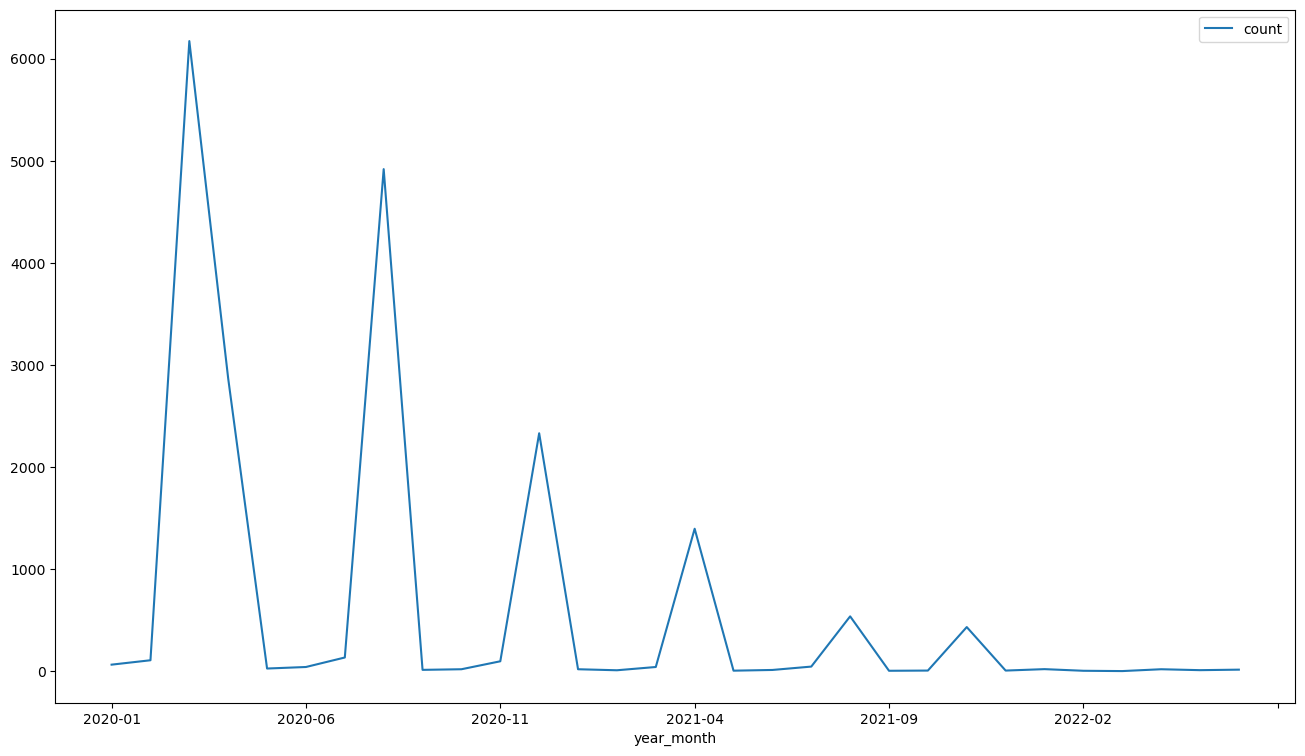

In [236]:
tmp3c.plot(x='year_month', y='count', figsize=(16,9))

d)

In [237]:
tmp3d = df3.filter(df3.year < 2024)\
    .groupby(df3.year, df3.primary_type)\
    .count()\
    .sort("count").orderBy(["count"], ascending=[0])

window = Window.partitionBy(tmp3d['year']).orderBy(tmp3d['count'].desc())

tmp3d = tmp3d\
    .select('*', F.rank().over(window).alias('rank'))\
    .filter(F.col('rank') <= 5)\
    .sort("year").orderBy(["year"], ascending=[0])\
    .toPandas()


In [238]:
tmp3d

,year,primary_type,count,rank
0,2022,THEFT,31,1
1,2022,CRIMINAL DAMAGE,11,2
2,2022,HOMICIDE,8,3
3,2022,BATTERY,7,4
4,2022,CRIMINAL TRESPASS,2,5
...,...,...,...,...
112,2001,THEFT,1282,1
113,2001,MOTOR VEHICLE THEFT,759,2
114,2001,DECEPTIVE PRACTICE,555,3
115,2001,BATTERY,277,4


<Axes: xlabel='year', ylabel='count'>

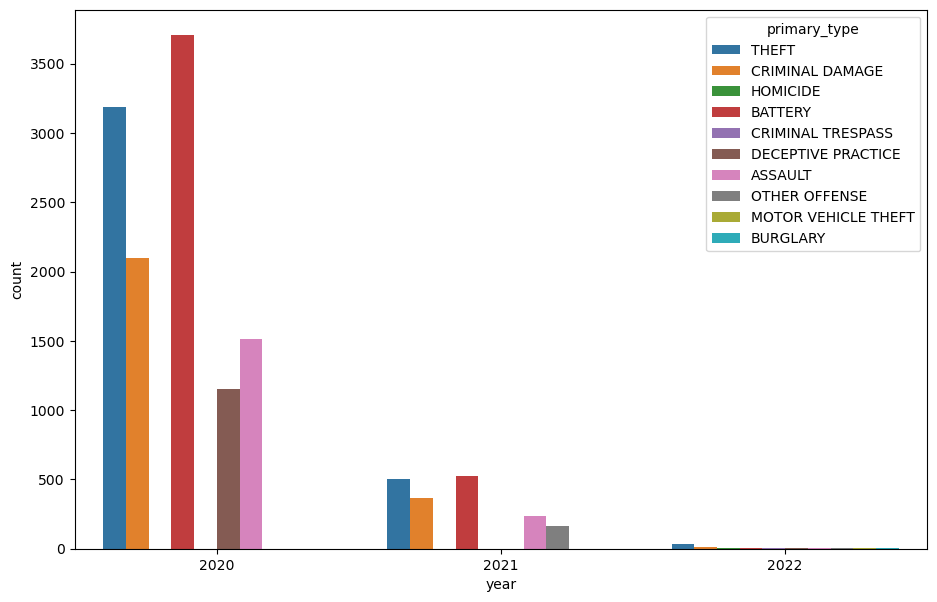

In [239]:
fig, ax = plt.subplots(figsize=(11,7))
sns.barplot(x='year', y='count', hue='primary_type', data=tmp3d[tmp3d.year >= 2020], ax=ax)

## Problem 4

a)

In [345]:
from pyspark.sql.window import Window
from pyspark.sql.functions import col, row_number, udf
from pyspark.sql.functions import rank
import pyspark.sql.functions as psf

In [278]:
crimesSpec = df3.groupby(df3.community_area_name)\
    .count()

In [284]:
partition=Window.orderBy(col("count").desc())

In [285]:
crimesSpec.withColumn("rank",psf.dense_rank().over(partition)).show()

+--------------------+-----+----+
| community_area_name|count|rank|
+--------------------+-----+----+
|              Austin|89118|   1|
|     Near North Side|61106|   2|
|      Near West Side|49683|   3|
|                Loop|48748|   4|
|         South Shore|48061|   5|
|      North Lawndale|46856|   6|
|       Humboldt Park|45951|   7|
|           West Town|45582|   8|
|      Auburn Gresham|41344|   9|
|      West Englewood|40398|  10|
|            Roseland|38136|  11|
|           Englewood|36653|  12|
|Greater Grand Cro...|36220|  13|
|             Chatham|34121|  14|
|        Chicago Lawn|33131|  15|
|            Lakeview|31141|  16|
|        Logan Square|31078|  17|
|  West Garfield Park|29785|  18|
|            New City|28038|  19|
|  East Garfield Park|27589|  20|
+--------------------+-----+----+
only showing top 20 rows



b)

In [290]:
crimesSpec1 = df3.groupby(df3.date, df3.community_area_name)\
    .count().orderBy("date")

In [291]:
crimesSpec1.show()

+----------+--------------------+-----+
|      date| community_area_name|count|
+----------+--------------------+-----+
|2001-01-01|        Lincoln Park|    1|
|2001-01-01|            Roseland|    1|
|2001-01-01|     Washington Park|    2|
|2001-01-01|Greater Grand Cro...|    1|
|2001-01-01|             Pullman|    1|
|2001-01-01|  East Garfield Park|    1|
|2001-01-01|      North Lawndale|    1|
|2001-01-01|         South Shore|    3|
|2001-01-01|            New City|    1|
|2001-01-01|       Brighton Park|    2|
|2001-01-01|       Humboldt Park|    2|
|2001-01-01|            Lakeview|    1|
|2001-01-01|       South Chicago|    1|
|2001-01-01|         Avalon Park|    1|
|2001-01-01|             Hermosa|    1|
|2001-01-01|         Rogers Park|    2|
|2001-01-01|      Garfield Ridge|    3|
|2001-01-01|        Norwood Park|    1|
|2001-01-01|             Chatham|    1|
|2001-01-01|             Beverly|    1|
+----------+--------------------+-----+
only showing top 20 rows



In [299]:
crimesSpec1 = crimesSpec1.withColumn('unix_time', F.unix_timestamp('date', 'yyyy-MM-dd'))

winSpec = Window.partitionBy('community_area_name').orderBy('unix_time').rangeBetween(-7*86400, 0)

crimesSpec1 = crimesSpec1.withColumn('rolling_sum', F.sum('count').over(winSpec))

crimesSpec1.orderBy('community_area_name', 'date').show(20, False)

+-------------------+-------------------+-----+----------+-----------+
|date               |community_area_name|count|unix_time |rolling_sum|
+-------------------+-------------------+-----+----------+-----------+
|2001-02-05 00:00:00|Albany Park        |1    |981331200 |1          |
|2001-02-13 00:00:00|Albany Park        |1    |982022400 |1          |
|2001-02-28 00:00:00|Albany Park        |1    |983318400 |1          |
|2001-03-05 00:00:00|Albany Park        |1    |983750400 |2          |
|2001-05-07 00:00:00|Albany Park        |1    |989193600 |1          |
|2001-08-07 00:00:00|Albany Park        |1    |997142400 |1          |
|2001-08-18 00:00:00|Albany Park        |1    |998092800 |1          |
|2001-09-26 00:00:00|Albany Park        |1    |1001462400|1          |
|2001-11-01 00:00:00|Albany Park        |1    |1004572800|1          |
|2001-11-05 00:00:00|Albany Park        |1    |1004918400|2          |
|2001-11-14 00:00:00|Albany Park        |1    |1005696000|1          |
|2001-

c)

In [301]:
crimesSpec2 = df3.groupby(df3.date, df3.community_area_name)\
    .count().orderBy("date")

In [302]:
crimesSpec2 = crimesSpec2.withColumn('unix_time', F.unix_timestamp('date', 'yyyy-MM-dd'))
winSpec = Window.partitionBy('community_area_name').orderBy('unix_time').rangeBetween(-7*86400, 0)
crimesSpec2 = crimesSpec2.withColumn('rolling_sum', F.sum('count').over(winSpec))
crimesSpec2 = crimesSpec2.withColumn('rolling_avg', F.avg('count').over(winSpec))
crimesSpec2.orderBy('community_area_name', 'date').show(20, False)

+----------+-------------------+-----+----------+-----------+------------------+
|date      |community_area_name|count|unix_time |rolling_sum|rolling_avg       |
+----------+-------------------+-----+----------+-----------+------------------+
|2001-02-05|Albany Park        |1    |981331200 |1          |1.0               |
|2001-02-13|Albany Park        |1    |982022400 |1          |1.0               |
|2001-02-28|Albany Park        |1    |983318400 |1          |1.0               |
|2001-03-05|Albany Park        |1    |983750400 |2          |1.0               |
|2001-05-07|Albany Park        |1    |989193600 |1          |1.0               |
|2001-08-07|Albany Park        |1    |997142400 |1          |1.0               |
|2001-08-18|Albany Park        |1    |998092800 |1          |1.0               |
|2001-09-26|Albany Park        |1    |1001462400|1          |1.0               |
|2001-11-01|Albany Park        |1    |1004572800|1          |1.0               |
|2001-11-05|Albany Park     

d)

In [303]:
tmp4d = df3.crosstab('primary_type', 'location_description').toPandas()
tmp4d.head()

,primary_type_location_description,ABANDONED BUILDING,AIRCRAFT,AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA,AIRPORT BUILDING NON-TERMINAL - SECURE AREA,AIRPORT EXTERIOR - NON-SECURE AREA,AIRPORT EXTERIOR - SECURE AREA,AIRPORT PARKING LOT,AIRPORT TERMINAL LOWER LEVEL - NON-SECURE AREA,AIRPORT TERMINAL LOWER LEVEL - SECURE AREA,...,VEHICLE - OTHER RIDE SERVICE,"VEHICLE - OTHER RIDE SHARE SERVICE (E.G., UBER, LYFT)","VEHICLE - OTHER RIDE SHARE SERVICE (LYFT, UBER, ETC.)",VEHICLE NON-COMMERCIAL,VEHICLE-COMMERCIAL,VEHICLE-COMMERCIAL - ENTERTAINMENT/PARTY BUS,VEHICLE-COMMERCIAL - TROLLEY BUS,WAREHOUSE,YARD,null
0,CRIMINAL TRESPASS,210,2,23,1,14,9,13,302,4,...,0,1,0,385,12,0,0,72,0,0
1,OFFENSE INVOLVING CHILDREN,6,0,0,0,2,0,0,1,2,...,0,0,0,76,1,0,2,1,0,0
2,NARCOTICS,514,3,2,7,4,3,1,6,14,...,2,5,0,3217,28,0,0,13,0,0
3,RITUALISM,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CRIMINAL SEXUAL ASSAULT,1,0,0,0,0,0,0,0,0,...,0,0,1,5,0,0,0,0,0,0


In [304]:
tmp4d = tmp4d.fillna(0)
tmp4d = tmp4d.set_index('primary_type_location_description')

<Axes: ylabel='primary_type_location_description'>

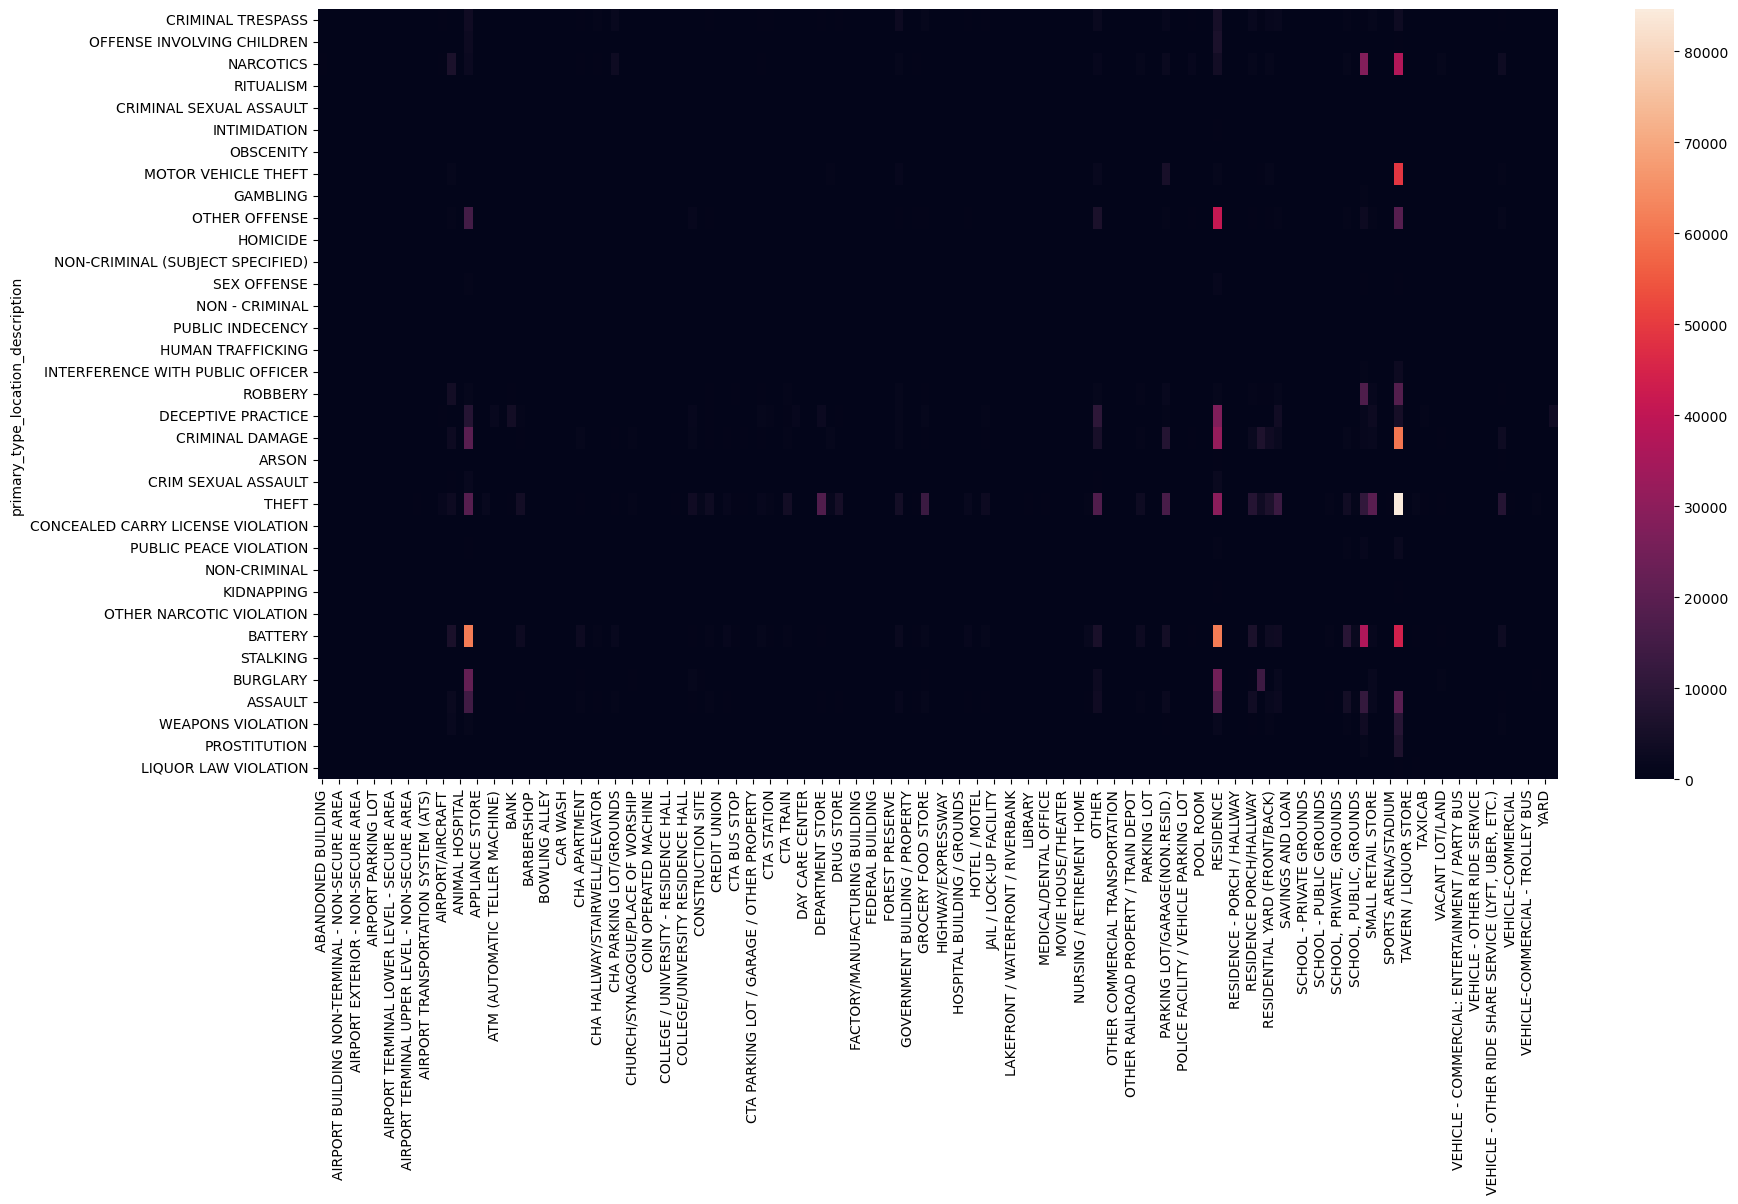

In [305]:
fig, ax = plt.subplots(figsize=(20,10))  
sns.heatmap(tmp4d, ax=ax)

## Problem 5

a)

In [306]:
%time df_covid = spark.read.csv("COVID-19_Daily_Cases__Deaths__and_Hospitalizations.csv", inferSchema=True, header=True)

CPU times: user 1.7 ms, sys: 983 µs, total: 2.68 ms
Wall time: 78.5 ms


In [307]:
df_covid.printSchema()

root
 |-- Date: string (nullable = true)
 |-- Cases - Total: integer (nullable = true)
 |-- Deaths - Total: integer (nullable = true)
 |-- Hospitalizations - Total: integer (nullable = true)
 |-- Cases - Age 0-17: integer (nullable = true)
 |-- Cases - Age 18-29: integer (nullable = true)
 |-- Cases - Age 30-39: integer (nullable = true)
 |-- Cases - Age 40-49: integer (nullable = true)
 |-- Cases - Age 50-59: integer (nullable = true)
 |-- Cases - Age 60-69: integer (nullable = true)
 |-- Cases - Age 70-79: integer (nullable = true)
 |-- Cases -  Age 80+: integer (nullable = true)
 |-- Cases - Age Unknown: integer (nullable = true)
 |-- Cases - Female: integer (nullable = true)
 |-- Cases - Male: integer (nullable = true)
 |-- Cases - Unknown Gender: integer (nullable = true)
 |-- Cases - Latinx: integer (nullable = true)
 |-- Cases - Asian Non-Latinx: integer (nullable = true)
 |-- Cases - Black Non-Latinx: integer (nullable = true)
 |-- Cases - White Non-Latinx: integer (nullable = 

In [309]:
df_covid = df_covid.withColumnRenamed("Date", "date")\
    .withColumnRenamed("Cases - Total", "cases-total")\
    .withColumnRenamed("Deaths - Total", "deaths-total")\
    .withColumnRenamed("Hospitalizations - Total", "hospitalizations-total")\
    .withColumnRenamed("Cases - Age 0-17", "cases-age_0-17")\
    .withColumnRenamed("Cases - Age 18-29", "cases-age_18-29")\
    .withColumnRenamed("Cases - Age 30-39", "cases-age_30-39")\
    .withColumnRenamed("Cases - Age 40-49", "cases-age_40-49")\
    .withColumnRenamed("Cases - Age 50-59", "cases-age_50-59")\
    .withColumnRenamed("Cases - Age 60-69", "cases-age_60-69")\
    .withColumnRenamed("Cases - Age 70-79", "cases-age_70-79")\
    .withColumnRenamed("Cases -  Age 80+", "cases-age_80+")\
    .withColumnRenamed("Cases - Age Unknown", "cases-age_unknown")\
    .withColumnRenamed("Cases - Female", "cases-female")\
    .withColumnRenamed("Cases - Male", "cases-male")\
    .withColumnRenamed("Cases - Unknown Gender", "cases-unknown_gender")\
    .withColumnRenamed("Cases - Latinx", "cases-latinx")\
    .withColumnRenamed("Cases - Asian Non-Latinx", "cases-asian_non-latinx")\
    .withColumnRenamed("Cases - Black Non-Latinx", "cases-black_non-latinx")\
    .withColumnRenamed("Cases - White Non-Latinx", "cases-white_non-latinx")\
    .withColumnRenamed("Cases - Other Race Non-Latinx", "cases-other_race_non-latinx")\
    .withColumnRenamed("Cases - Unknown Race/Ethnicity", "cases-unknown_race/ethnicity")\
    .withColumnRenamed("Deaths - Age 0-17",  "deaths-age_0-17")\
    .withColumnRenamed("Deaths - Age 18-29", "deaths-age_18-29")\
    .withColumnRenamed("Deaths - Age 30-39", "deaths-age_30-39")\
    .withColumnRenamed("Deaths - Age 40-49", "deaths-age_40-49")\
    .withColumnRenamed("Deaths - Age 50-59", "deaths-age_50-59")\
    .withColumnRenamed("Deaths - Age 60-69", "deaths-age_60-69")\
    .withColumnRenamed("Deaths - Age 70-79", "deaths-age_70-79")\
    .withColumnRenamed("Deaths - Age 80+", "deaths-age_80+")\
    .withColumnRenamed("Deaths - Age Unknown", "deaths-age_unknown")\
    .withColumnRenamed("Deaths - Female", "deaths-female")\
    .withColumnRenamed("Deaths - Male", "deaths-male")\
    .withColumnRenamed("Deaths - Unknown Gender", "deaths-unknown_gender")\
    .withColumnRenamed("Deaths - Latinx", "deaths-latinx")\
    .withColumnRenamed("Deaths - Asian Non-Latinx", "deaths-asian_non-latinx")\
    .withColumnRenamed("Deaths - Black Non-Latinx", "deaths-black_non-latinx")\
    .withColumnRenamed("Deaths - White Non-Latinx", "deaths-white_non-latinx")\
    .withColumnRenamed("Deaths - Other Race Non-Latinx", "deaths-other_race_non-latinx")\
    .withColumnRenamed("Deaths - Unknown Race/Ethnicity", "deaths-unknown_race/ethnicity")\
    .withColumnRenamed("Hospitalizations - Age 0-17",  "hospitalizations-age_0-17")\
    .withColumnRenamed("Hospitalizations - Age 18-29", "hospitalizations-age_18-29")\
    .withColumnRenamed("Hospitalizations - Age 30-39", "hospitalizations-age_30-39")\
    .withColumnRenamed("Hospitalizations - Age 40-49", "hospitalizations-age_40-49")\
    .withColumnRenamed("Hospitalizations - Age 50-59", "hospitalizations-age_50-59")\
    .withColumnRenamed("Hospitalizations - Age 60-69", "hospitalizations-age_60-69")\
    .withColumnRenamed("Hospitalizations - Age 70-79", "hospitalizations-age_70-79")\
    .withColumnRenamed("Hospitalizations - Age 80+", "hospitalizations-age_80+")\
    .withColumnRenamed("Hospitalizations - Age Unknown", "hospitalizations-age_unknown")\
    .withColumnRenamed("Hospitalizations - Female", "hospitalizations-female")\
    .withColumnRenamed("Hospitalizations - Male", "hospitalizations-male")\
    .withColumnRenamed("Hospitalizations - Unknown Gender", "hospitalizations-unknown_gender")\
    .withColumnRenamed("Hospitalizations - Latinx", "hospitalizations-latinx")\
    .withColumnRenamed("Hospitalizations - Asian Non-Latinx", "hospitalizations-asian_non-latinx")\
    .withColumnRenamed("Hospitalizations - Black Non-Latinx", "hospitalizations-black_non-latinx")\
    .withColumnRenamed("Hospitalizations - White Non-Latinx", "hospitalizations-white_non-latinx")\
    .withColumnRenamed("Hospitalizations - Other Race Non-Latinx",  "hospitalizations-other_race_non-latinx")\
    .withColumnRenamed("Hospitalizations - Unknown Race/Ethnicity", "hospitalizations-unknown_race/ethnicity")

In [310]:
df_covid.write.mode('overwrite').saveAsTable('covid_cases')

In [311]:
df_covid1 = hive_context.table("covid_cases")
df_covid1.show(5)

+----------+-----------+------------+----------------------+--------------+---------------+---------------+---------------+---------------+---------------+---------------+-------------+-----------------+------------+----------+--------------------+------------+----------------------+----------------------+----------------------+---------------------------+----------------------------+---------------+----------------+----------------+----------------+----------------+----------------+----------------+--------------+------------------+-------------+-----------+---------------------+-------------+-----------------------+-----------------------+-----------------------+----------------------------+-----------------------------+-------------------------+--------------------------+--------------------------+--------------------------+--------------------------+--------------------------+--------------------------+------------------------+----------------------------+-----------------------+--

In [317]:
df_covid1.printSchema()

root
 |-- date: string (nullable = true)
 |-- cases-total: integer (nullable = true)
 |-- deaths-total: integer (nullable = true)
 |-- hospitalizations-total: integer (nullable = true)
 |-- cases-age_0-17: integer (nullable = true)
 |-- cases-age_18-29: integer (nullable = true)
 |-- cases-age_30-39: integer (nullable = true)
 |-- cases-age_40-49: integer (nullable = true)
 |-- cases-age_50-59: integer (nullable = true)
 |-- cases-age_60-69: integer (nullable = true)
 |-- cases-age_70-79: integer (nullable = true)
 |-- cases-age_80+: integer (nullable = true)
 |-- cases-age_unknown: integer (nullable = true)
 |-- cases-female: integer (nullable = true)
 |-- cases-male: integer (nullable = true)
 |-- cases-unknown_gender: integer (nullable = true)
 |-- cases-latinx: integer (nullable = true)
 |-- cases-asian_non-latinx: integer (nullable = true)
 |-- cases-black_non-latinx: integer (nullable = true)
 |-- cases-white_non-latinx: integer (nullable = true)
 |-- cases-other_race_non-latinx:

b)

In [426]:
df3_cases = df3.groupby(df3.date, df3.primary_type)\
    .count()\
    .orderBy(["date"], ascending=[1])
df3_cases.show(5)

+----------+--------------------+-----+
|      date|        primary_type|count|
+----------+--------------------+-----+
|2001-01-01|         SEX OFFENSE|    3|
|2001-01-01|  DECEPTIVE PRACTICE|   14|
|2001-01-01| CRIM SEXUAL ASSAULT|    2|
|2001-01-01|               THEFT|   14|
|2001-01-01|OFFENSE INVOLVING...|   18|
+----------+--------------------+-----+
only showing top 5 rows



c)

In [427]:
df3_crime_cases = df3_cases.filter(df3_cases.date >= "2020-01-01").groupby(["date"]).sum().orderBy(["date"], ascending=[1])
df3_crime_cases.show(5)

+----------+----------+
|      date|sum(count)|
+----------+----------+
|2020-01-01|        13|
|2020-01-02|         2|
|2020-01-03|         6|
|2020-01-05|         1|
|2020-01-06|         3|
+----------+----------+
only showing top 5 rows



In [467]:
df_cases = df_covid1.withColumn('date', F.to_date(F.col('date'), 'dd/MM/yyyy').alias('date'))

In [468]:
df_cases = df_cases.filter(df_cases.date >= "2020-01-01")\
    .orderBy(["date"], ascending=[1])

In [396]:
from pyspark.sql.types import DateType
from datetime import datetime
from pyspark.sql.functions import date_format, to_timestamp, to_date

In [470]:
df_cases.show(5)

+----------+-----------+------------+----------------------+--------------+---------------+---------------+---------------+---------------+---------------+---------------+-------------+-----------------+------------+----------+--------------------+------------+----------------------+----------------------+----------------------+---------------------------+----------------------------+---------------+----------------+----------------+----------------+----------------+----------------+----------------+--------------+------------------+-------------+-----------+---------------------+-------------+-----------------------+-----------------------+-----------------------+----------------------------+-----------------------------+-------------------------+--------------------------+--------------------------+--------------------------+--------------------------+--------------------------+--------------------------+------------------------+----------------------------+-----------------------+--

In [471]:
df3_crime_cases.show(5)

+----------+----------+
|      date|sum(count)|
+----------+----------+
|2020-01-01|        13|
|2020-01-02|         2|
|2020-01-03|         6|
|2020-01-05|         1|
|2020-01-06|         3|
+----------+----------+
only showing top 5 rows



In [473]:
print((df3_crime_cases.count(), len(df3_crime_cases.columns)))

(412, 2)


In [484]:
ddda = df3_crime_cases.join(df_cases, df3_crime_cases["date"]== df_cases["date"], "left")
#dataframe.join(dataframe1, dataframe.ID == dataframe1.ID, "inner").show()

In [485]:
ddda.show(5)

+----------+----------+----------+-----------+------------+----------------------+--------------+---------------+---------------+---------------+---------------+---------------+---------------+-------------+-----------------+------------+----------+--------------------+------------+----------------------+----------------------+----------------------+---------------------------+----------------------------+---------------+----------------+----------------+----------------+----------------+----------------+----------------+--------------+------------------+-------------+-----------+---------------------+-------------+-----------------------+-----------------------+-----------------------+----------------------------+-----------------------------+-------------------------+--------------------------+--------------------------+--------------------------+--------------------------+--------------------------+--------------------------+------------------------+----------------------------+----

d)

<Axes: xlabel='year', ylabel='count'>

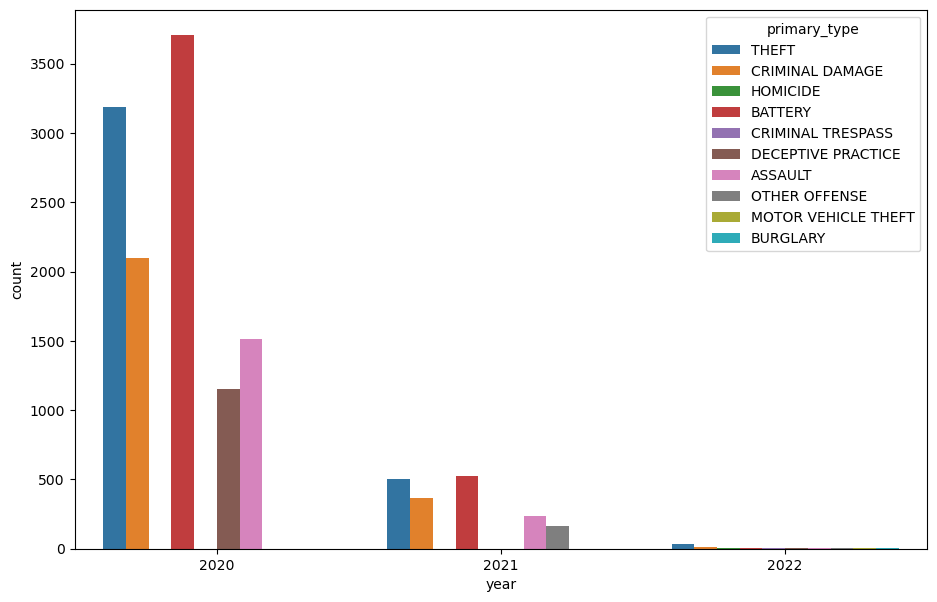

In [488]:
fig, ax = plt.subplots(figsize=(11,7))
sns.barplot(x='year', y='count', hue='primary_type', data=tmp3d[tmp3d.year >= 2020], ax=ax)

In [490]:
df_cases1 = df_cases.toPandas()

<Axes: xlabel='date'>

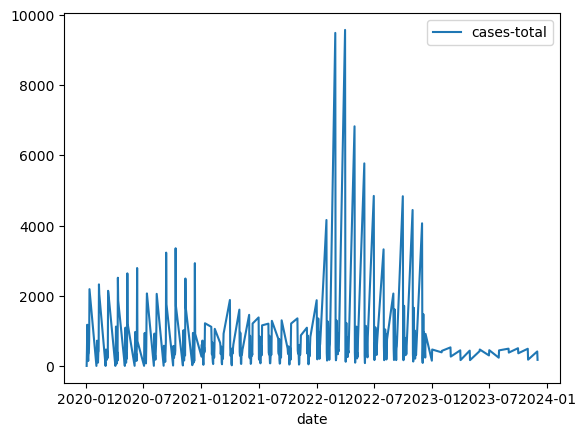

In [491]:
df_cases1.plot.line(x="date", y="cases-total")

**According to the plots, the covid to some extent makes the crimes decrease, probably because of the sickness and death.**